In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgn
import scipy.stats as stats

# Task 1

(1024, 1)
(1024, 1)


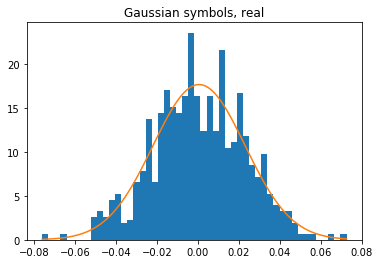

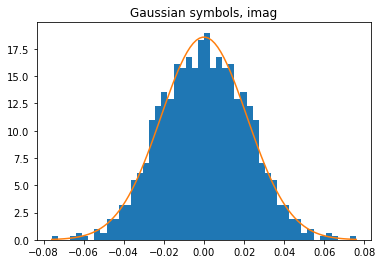

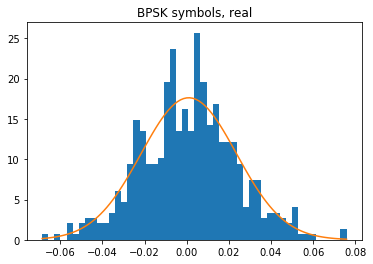

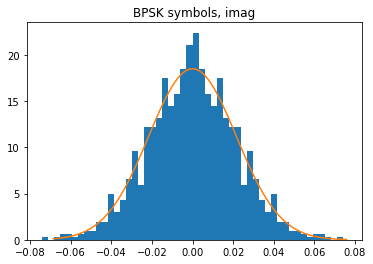

In [73]:
def loadFile (filename):
    matfile = scipy.io.loadmat('data/' + filename + '.mat')[list( scipy.io.loadmat('data/' + filename + '.mat'))[-1]]
    
    return matfile
gauss = loadFile('T1_data_Sk_Gaussian')
bpsk = loadFile('T1_data_Sk_BPSK').T
print(bpsk.shape)
print(gauss.shape)

s_gauss = np.fft.ifft(gauss, axis=0)
s_bpsk = np.fft.ifft(bpsk, axis = 0)


plt.title("Gaussian symbols, real")
y = np.real(s_gauss)
loc, scale = stats.norm.fit(y) 
x = np.linspace(np.min(y), np.max(y), 100)
plt.hist(y,50, normed=True)
plt.plot(x, stats.norm.pdf(x,loc, scale))
plt.show()
plt.title("Gaussian symbols, imag")
y = np.imag(s_gauss)
loc, scale = stats.norm.fit(y) 
x = np.linspace(np.min(y), np.max(y), 100)
plt.hist(y,50, normed=True)

plt.plot(x, stats.norm.pdf(x,loc, scale))
plt.show()
plt.title("BPSK symbols, real")
y = np.real(s_bpsk)
loc, scale = stats.norm.fit(y) 
x = np.linspace(np.min(y), np.max(y), 100)
plt.hist(y,50, normed=True)

plt.plot(x, stats.norm.pdf(x,loc, scale))
plt.show()
plt.title("BPSK symbols, imag")
y = np.imag(s_bpsk)
loc, scale = stats.norm.fit(y) 
plt.hist(y,50, normed=True)

plt.plot(x, stats.norm.pdf(x,loc, scale))
plt.show()


In [4]:
pow_gauss = np.mean(np.real(s_gauss)*np.imag(s_gauss))
pow_bpsk = np.mean(np.real(s_bpsk)*np.imag(s_bpsk))
mean_gauss = np.mean(np.real(s_gauss)) +  1j * np.mean(np.imag(s_gauss))
mean_bpsk = np.mean(np.real(s_bpsk)) +  1j * np.mean(np.imag(s_bpsk))

print(mean_bpsk, mean_gauss, pow_bpsk, pow_gauss)


(0.0009765624999999998-1.6263032587282567e-19j) (0.0005250655659629884-1.0842021724855044e-19j) 4.870439446712227e-21 3.3881317890172014e-21


It seems like the model fits with resonably accuracy

The mean can be approximated to be zero

# Task 3

(1024, 1)
(1024, 1)
0.9914505887535083 0.9947618878979152


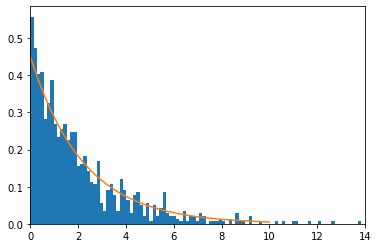

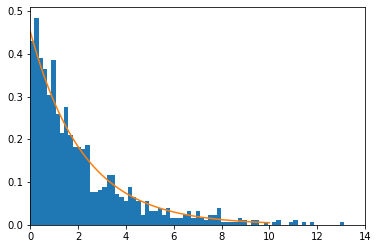

In [74]:
x_H0 = loadFile('T3_data_x_H0')
x_H1 = loadFile('T3_data_x_H1')
print(bpsk.shape)
print(gauss.shape)
x_r_H0 = np.real(x_H0)
x_i_H0 = np.imag(x_H0)
x_r_H1 = np.real(x_H1)
x_i_H1 = np.imag(x_H1)

var_s = np.var(loadFile('T3_data_sigma_s'))
var_w = np.var(loadFile('T3_data_sigma_w'))

print(var_s, var_w)

H0 = 2 * (x_r_H0**2 + x_i_H0**2) / (var_s)
H1 = 2 * (x_r_H1**2 + x_i_H1**2) / (var_s + var_w)

x = np.linspace(0, 10, 100)

bins = 100


df, loc, scale = stats.chi2.fit(H0)
H0_pdf = stats.chi2.pdf(x, 2, 0, scale)

H1_pdf = stats.chi2.pdf(x, 2, 0, scale)


plt.xlim(0,14)
plt.hist(H0, bins=bins, normed=True)
plt.plot(x, H0_pdf)
plt.show()

plt.xlim(0,14)
plt.hist(H1, bins=bins, normed=True)
plt.plot(x, H1_pdf)
plt.show()






The Chi-square pdf fits the pdf of the power function well with 2 degrees of freedom, with the pdf of H0 smaller than H1

['K = 1', 'K = 11', 'K = 21', 'K = 31', 'K = 41', 'K = 51']


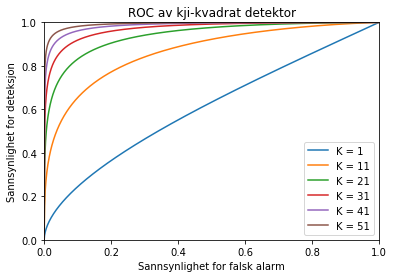

In [96]:

#Computing the Pfa and Pd:

var_s = np.var(loadFile('T3_data_sigma_s'))
var_w = np.var(loadFile('T3_data_sigma_w'))

Pfa = 0.01
N = 100


def n (l, K, var_w, var_s):
        return (np.log(l)*np.log(var_w) + np.log(var_s + var_w) )/((np.log(l)/var_w) - 1/(var_s + var_w)) 

for K in range(1,52,10):
    
    Pfa = np.linspace(0,1,1000) # stats.chi2.sf(K*ns/(var_w),df=K)
    n = stats.chi2.isf(Pfa,df=K)*var_w/K
    #ns = n(np.linspace(0,10,1000), K, var_w, var_s)
    
    Pd = stats.chi2.sf(K*n/((var_w + var_s)),df=K)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.plot(Pfa,Pd, label=("K = " + str(K)))
legend = ["K = " + str(i) for i in range(1,52,10)]
print(legend)
plt.legend(legend)
plt.xlabel("Sannsynlighet for falsk alarm")
plt.ylabel("Sannsynlighet for deteksjon")
plt.title("ROC av kji-kvadrat detektor")
plt.show()



### Task 6




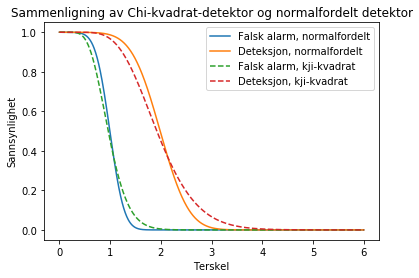

In [77]:
n = np.linspace(0,6,1000)
K=20


Pfa = stats.norm.sf( (K*((n / var_w) - 1))/(K/np.sqrt(K)))
Pda = stats.norm.sf((K*((n / (var_w + var_s)) - 1))/(K/np.sqrt(K)))


plt.xlabel("Terskel")
plt.ylabel("Sannsynlighet")

plt.plot(n,Pfa)
plt.plot(n,Pda)

Pfa = stats.chi2.sf(K*n/(var_w), df=K)
Pda = stats.chi2.sf(K*n/((var_w + var_s)), df=K)

plt.plot(n,Pfa, linestyle="--")
plt.plot(n,Pda, linestyle="--")

plt.legend(("Falsk alarm, normalfordelt","Deteksjon, normalfordelt","Falsk alarm, kji-kvadrat","Deteksjon, kji-kvadrat") )
plt.title("Sammenligning av kji-kvadrat-detektor og normalfordelt detektor")
plt.show()


### Task 7 numerical examples

In [85]:
Pfa = np.linspace(0.1,0.01,10)
Pda = np.linspace(0.9,0.5, 10)
Qpfa = stats.norm.isf(Pfa)
Qpda = stats.norm.isf(Pda)


n = (Qpfa - Qpda)/(Qpfa/(var_w + var_s) - Qpda/var_w)

k = ( Qpfa / ( n/var_w - 1)  )**2

print(k)


[14.84726648 12.04020301 10.09146385  8.63758968  7.51224009  6.62998593
  5.94901676  5.46250868  5.21782223  5.44810466]


1.114815104176332 1.0800969728465375
(256, 100)
(100,)


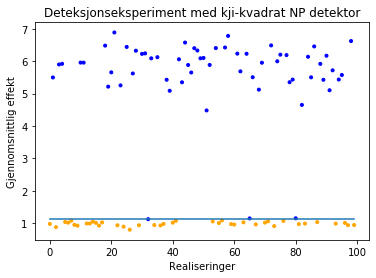

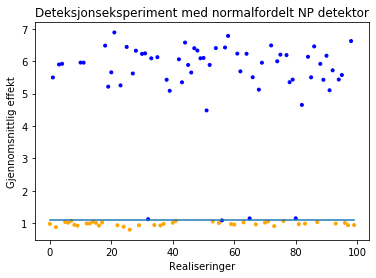

Pfa chi:  0.075
Pfa norm:  0.10256410256410256


In [97]:
Pfa = 0.1
var_s = 5
var_w = 1
K = 256

n_chi = stats.chi2.isf(Pfa,df=K) * var_w / K
n_norm = var_w * (stats.norm.isf(Pfa)/np.sqrt(K) + 1)
print(n_chi, n_norm)

signal = loadFile("T8_numerical_experiment")
print(signal.shape)

test = np.sum(np.square(np.abs(signal)), axis=0)/K
print(test.shape)

x = np.arange(0,100)

plt.xlabel("Realiseringer")
plt.ylabel("Gjennomsnittlig effekt")

plt.title("Deteksjonseksperiment med kji-kvadrat NP detektor")
color_chi = np.where((test > n_chi) , 'blue', 'orange')
plt.scatter(x,test, color=color_chi, marker=".")
plt.plot(x, np.ones(100)*n_chi)
plt.show()

plt.xlabel("Realiseringer")
plt.ylabel("Gjennomsnittlig effekt")
plt.title("Deteksjonseksperiment med normalfordelt NP detektor")
color_norm = np.where((test > n_norm) , 'blue', 'orange')
plt.scatter(x,test, color=color_norm, marker=".")
plt.plot(x, np.ones(100)*n_norm)
plt.show()

detected_count_chi = len(np.where((test> n_chi))[0])
pfa_est_chi = (3 / (len(test) - detected_count_chi))
print("Pfa chi: ", pfa_est_chi)

detected_count_norm = len(np.where((test> n_norm))[0])
pfa_est_norm = (4 / (len(test) - detected_count_norm))
print("Pfa norm: ", pfa_est_norm)

1.21703259033959 1.1453967421275526
(256, 100)
(100,)


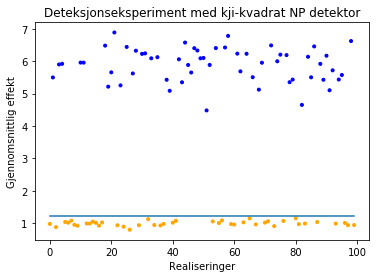

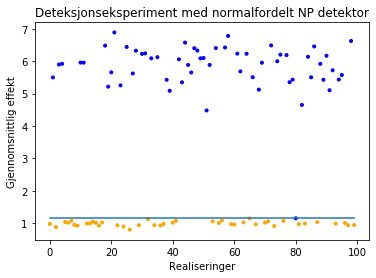

Pfa chi:  0.0
Pfa norm:  0.023809523809523808


In [99]:
Pfa = 0.01
var_s = 5
var_w = 1
K = 256

n_chi = stats.chi2.isf(Pfa,df=K) * var_w / K
n_norm = var_w * (stats.norm.isf(Pfa)/np.sqrt(K) + 1)
print(n_chi, n_norm)

signal = loadFile("T8_numerical_experiment")
print(signal.shape)

test = np.sum(np.square(np.abs(signal)), axis=0)/K
print(test.shape)

x = np.arange(0,100)

plt.xlabel("Realiseringer")
plt.ylabel("Gjennomsnittlig effekt")

plt.title("Deteksjonseksperiment med kji-kvadrat NP detektor")
color_chi = np.where((test > n_chi) , 'blue', 'orange')
plt.scatter(x,test, color=color_chi, marker=".")
plt.plot(x, np.ones(100)*n_chi)
plt.show()

plt.xlabel("Realiseringer")
plt.ylabel("Gjennomsnittlig effekt")
plt.title("Deteksjonseksperiment med normalfordelt NP detektor")
color_norm = np.where((test > n_norm) , 'blue', 'orange')
plt.scatter(x,test, color=color_norm, marker=".")
plt.plot(x, np.ones(100)*n_norm)
plt.show()

detected_count_chi = len(np.where((test> n_chi))[0])
pfa_est_chi = (0 / (len(test) - detected_count_chi))
print("Pfa chi: ", pfa_est_chi)

detected_count_norm = len(np.where((test> n_norm))[0])
pfa_est_norm = (1 / (len(test) - detected_count_norm))
print("Pfa norm: ", pfa_est_norm)